# Worksheet 16

Name:  Grace Elias
UID: U91459237

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

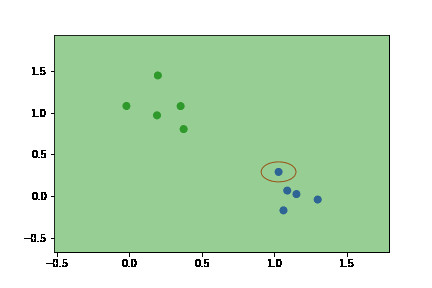

In [3]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from IPython.display import Image

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    decision_value = sum(alpha_i[j] * np.dot(X[j], x) for j in range(len(X))) + b
    return decision_value

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    prediction = predict(alpha_i, b, x)
    error = np.sign(prediction) != y

    if error:
        alpha_i[i] += learning_rate * y
        b += learning_rate * y
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Image(filename='svm_dual.gif')

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

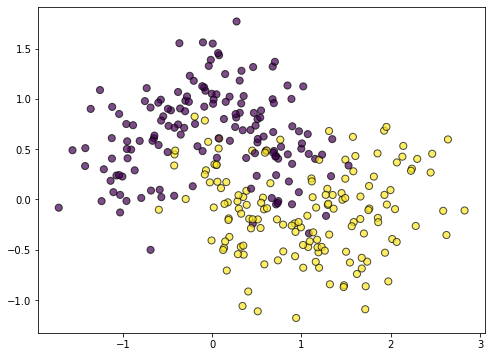

Accuracy: 0.9333333333333333


In [32]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

def custom_kernel(x1, x2, sigma=10):
    # RBF kernel
    return np.exp(-sigma * (np.linalg.norm(x1[:, np.newaxis] - x2, axis=2) ** 2))

X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50, alpha=0.7)
plt.show()

svm_classifier = SVC(kernel=custom_kernel)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

I would decrease n because higher degree polynomials cause more complex models which fit the training data more precisely, and can pick up on noise and other bad features of the training data. Decreasing n increases generalization. 

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

I would increase sigma because it will broaden the kernel's influence and allow my model to capture wider trends in the training data. This will cause the model to generalize new, unseen data better. 

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

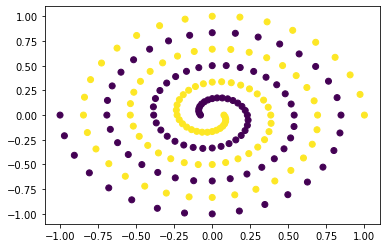

Accuracy: 0.7288135593220338


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def custom_kernel(x1, x2, sigma=100):
    # RBF kernel
    return np.exp(-sigma * (np.linalg.norm(x1[:, np.newaxis] - x2, axis=2) ** 2))

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

data_path = "spiral.data"  
data = np.loadtxt(data_path)
x, y = data[:, :2], data[:, 2]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

svm_classifier = SVC(kernel=custom_kernel)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)